<a href="https://colab.research.google.com/github/noschist/Brite/blob/main/MLPhase1Sreekumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sreekumar Vijayakumar
### AM.EN.U4CSE18152
### CSE-B

# Installing mplfinance for making a candlestick chart in Part 4

In [ ]:
pip install mplfinance

# Initial Imports

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
%matplotlib inline 
#%matplotlib inline sets the backend of matplotlib to the 'inline' backend [The resulting plots will then be stored in the notebook document.]
import warnings
warnings.filterwarnings('ignore')

# Part 1 : Loading Data

In [ ]:
nvd = pd.read_csv('NVDA.csv',index_col=0,parse_dates=True)

In [ ]:
nvd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,131.042496,136.524994,129.625000,131.134995,131.036606,56064000
2021-01-05,130.997498,134.434998,130.869995,134.047501,133.946930,32276000
2021-01-06,132.225006,132.449997,125.860001,126.144997,126.050354,58042400
2021-01-07,129.675003,133.777496,128.865005,133.440002,133.339874,46148000
2021-01-08,133.625000,134.210007,130.419998,132.767502,132.667877,29252800


In [ ]:
nvd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2021-01-04 to 2021-09-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       179 non-null    float64
 1   High       179 non-null    float64
 2   Low        179 non-null    float64
 3   Close      179 non-null    float64
 4   Adj Close  179 non-null    float64
 5   Volume     179 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 9.8 KB


In [ ]:
nvd.describe()

,Open,High,Low,Close,Adj Close,Volume
count,179.000000,179.000000,179.000000,179.000000,179.000000,1.790000e+02
mean,165.548715,168.021634,162.891034,165.705768,165.648249,3.432753e+07
std,32.277643,32.455736,32.088897,32.427459,32.451108,1.596906e+07
min,121.302498,124.712502,115.665001,115.932503,115.845520,1.464430e+07
25%,137.336251,139.227501,133.927505,136.647499,136.568535,2.279080e+07
50%,153.232498,154.970001,151.250000,153.302505,153.187469,2.938960e+07
75%,196.489998,198.699997,192.650002,196.279998,196.245392,4.048720e+07
max,228.330002,230.429993,225.509995,228.429993,228.429993,9.688560e+07


The dataset has 6 attributes - '**Open**', '**High**', '**Low**', '**Close**', '**Adj Close**', '**Volume**'

# Part 2 : Plotting the data

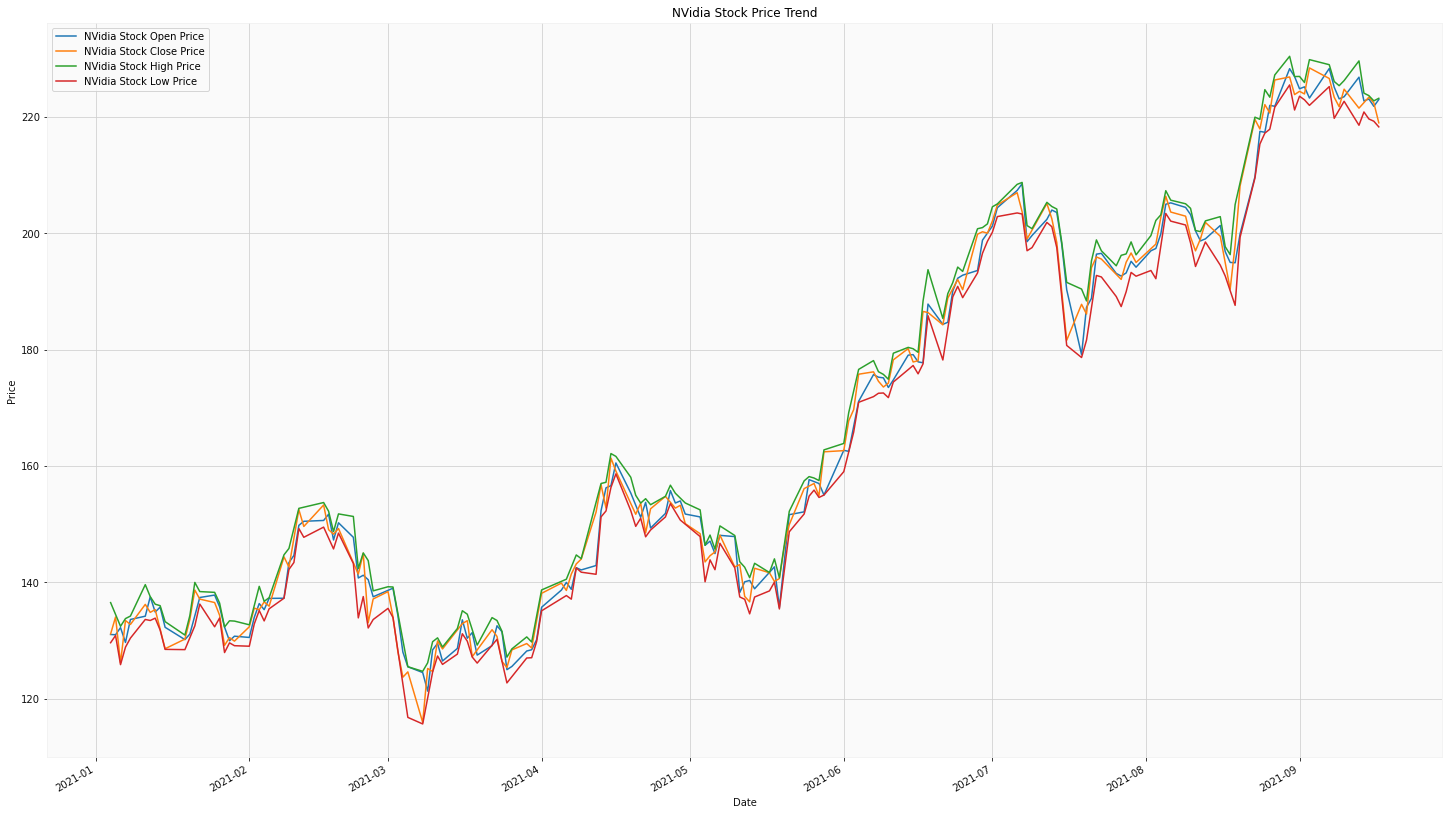

In [ ]:
nvd['Open'].plot(label = 'NVidia Stock Open Price', figsize = (25,15))
nvd['Close'].plot(label = 'NVidia Stock Close Price')
nvd['High'].plot(label = 'NVidia Stock High Price')
nvd['Low'].plot(label = 'NVidia Stock Low Price')
plt.legend()
plt.title('NVidia Stock Price Trend')
plt.ylabel('Price')
plt.show()

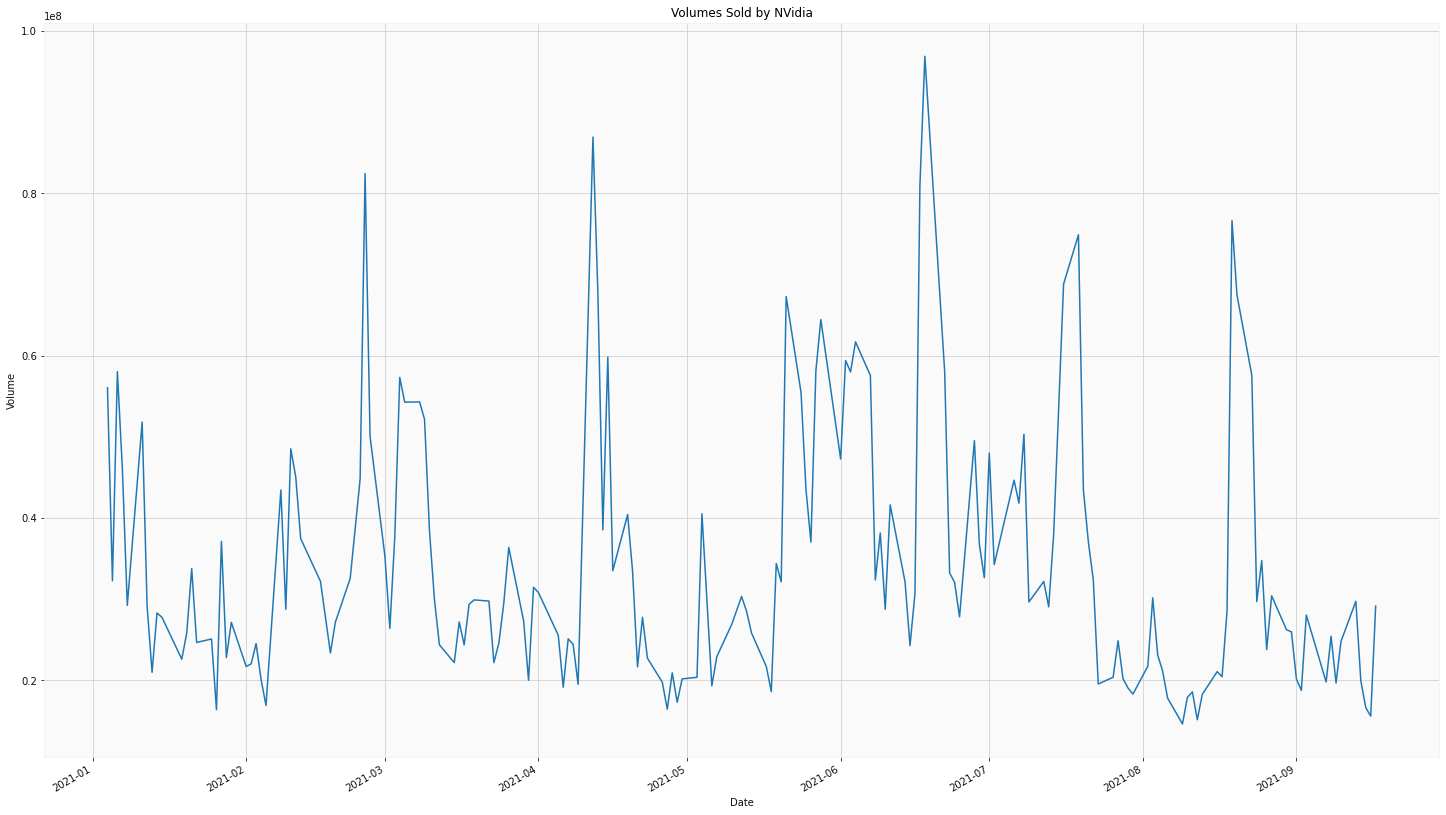

In [ ]:
nvd['Volume'].plot(label = 'Volume', figsize = (25,15))
plt.title('Volumes Sold by NVidia')
plt.ylabel('Volume')
plt.show()

In [ ]:
nvd['Total Traded'] = nvd['Volume'] * nvd['Open']

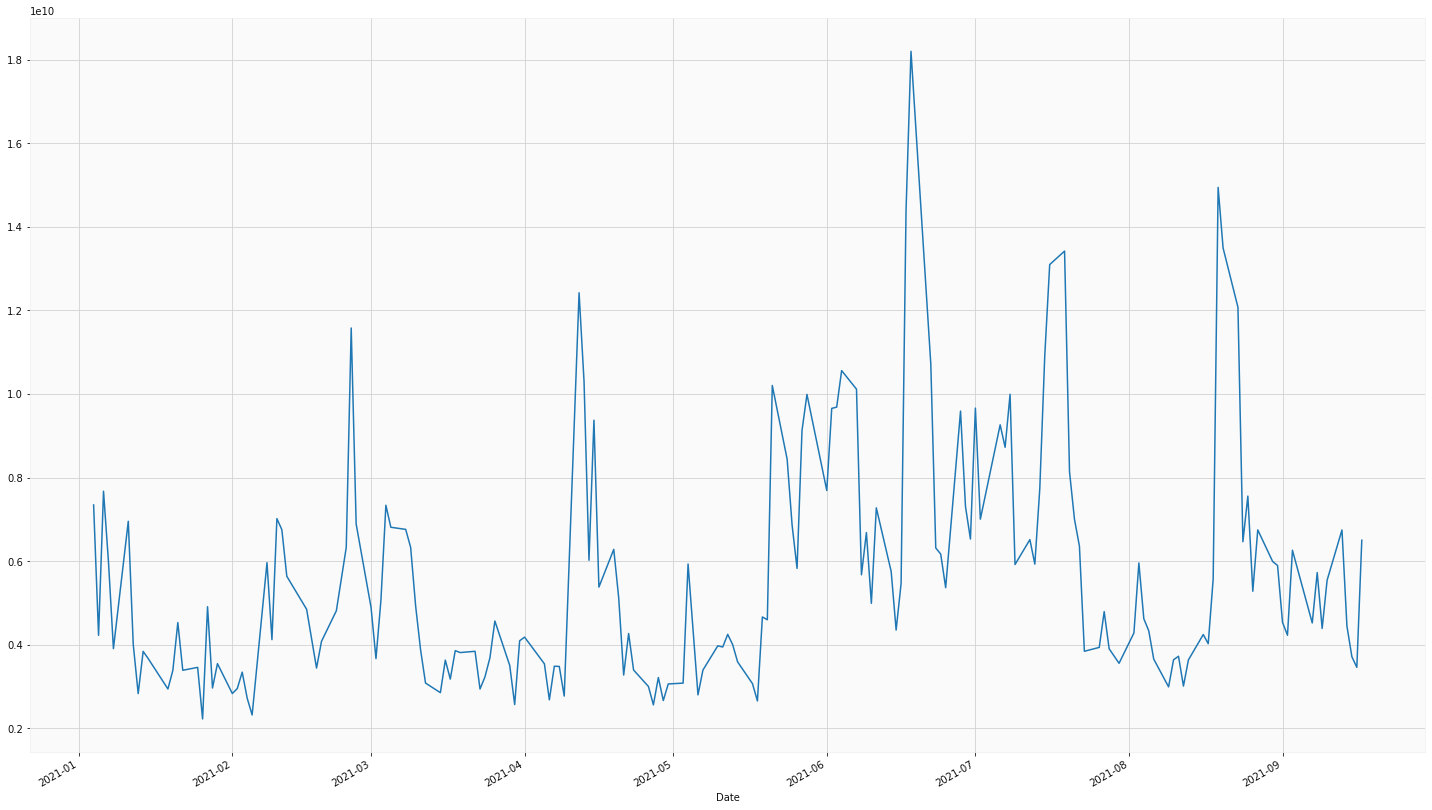

In [ ]:
nvd['Total Traded'].plot(figsize = (25,15))

On observing the Volume graph and the Total Traded graph, we can see that Volume significantly affects the Total Traded Nvidia stocks.

# Part 3 : Moving Average

### 5 Day Moving Average

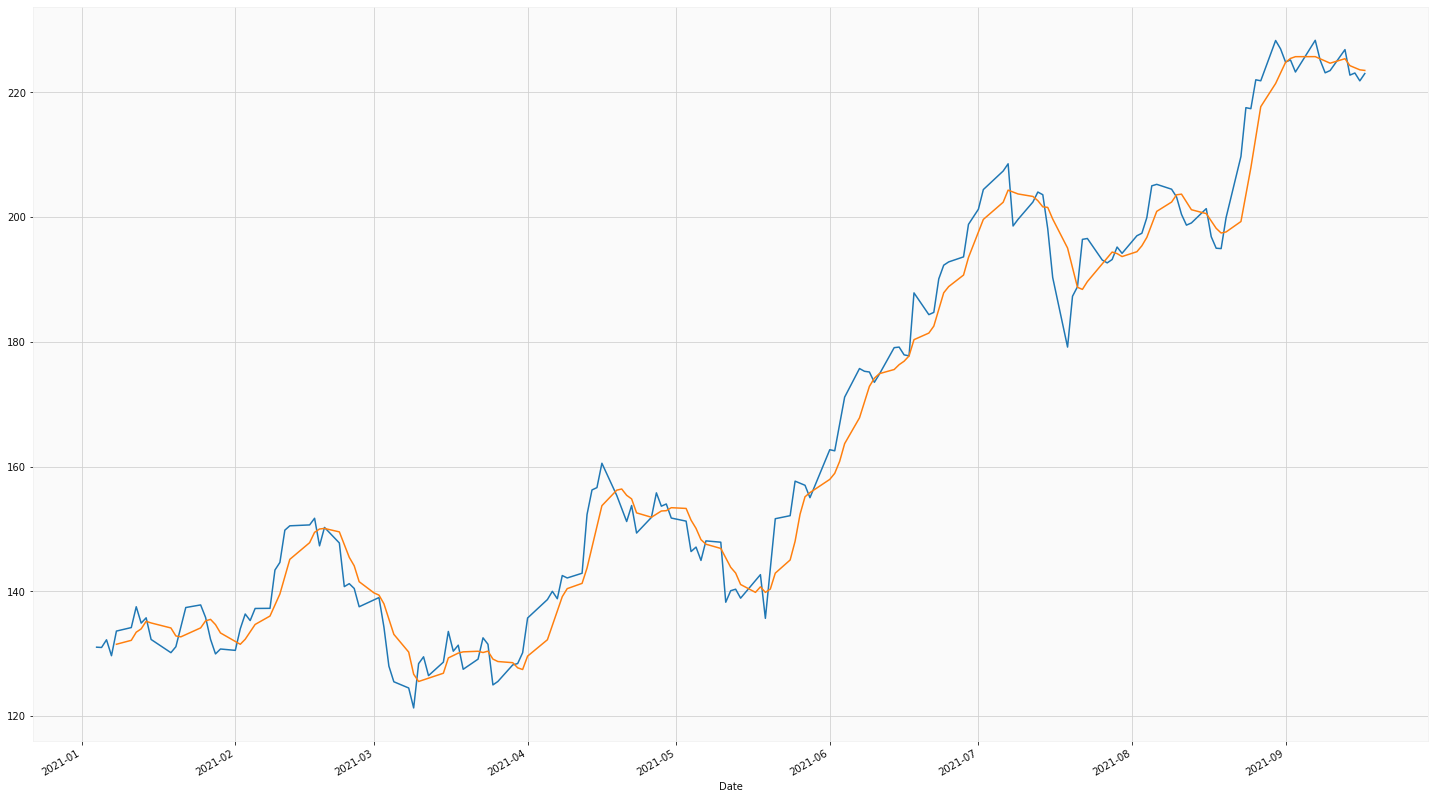

In [ ]:
nvd['Open'].plot(figsize = (25,15))
nvd['MA'] = nvd['Open'].rolling(5).mean()
nvd['MA'].plot(label = 'MA')

### 10 Day Moving Average

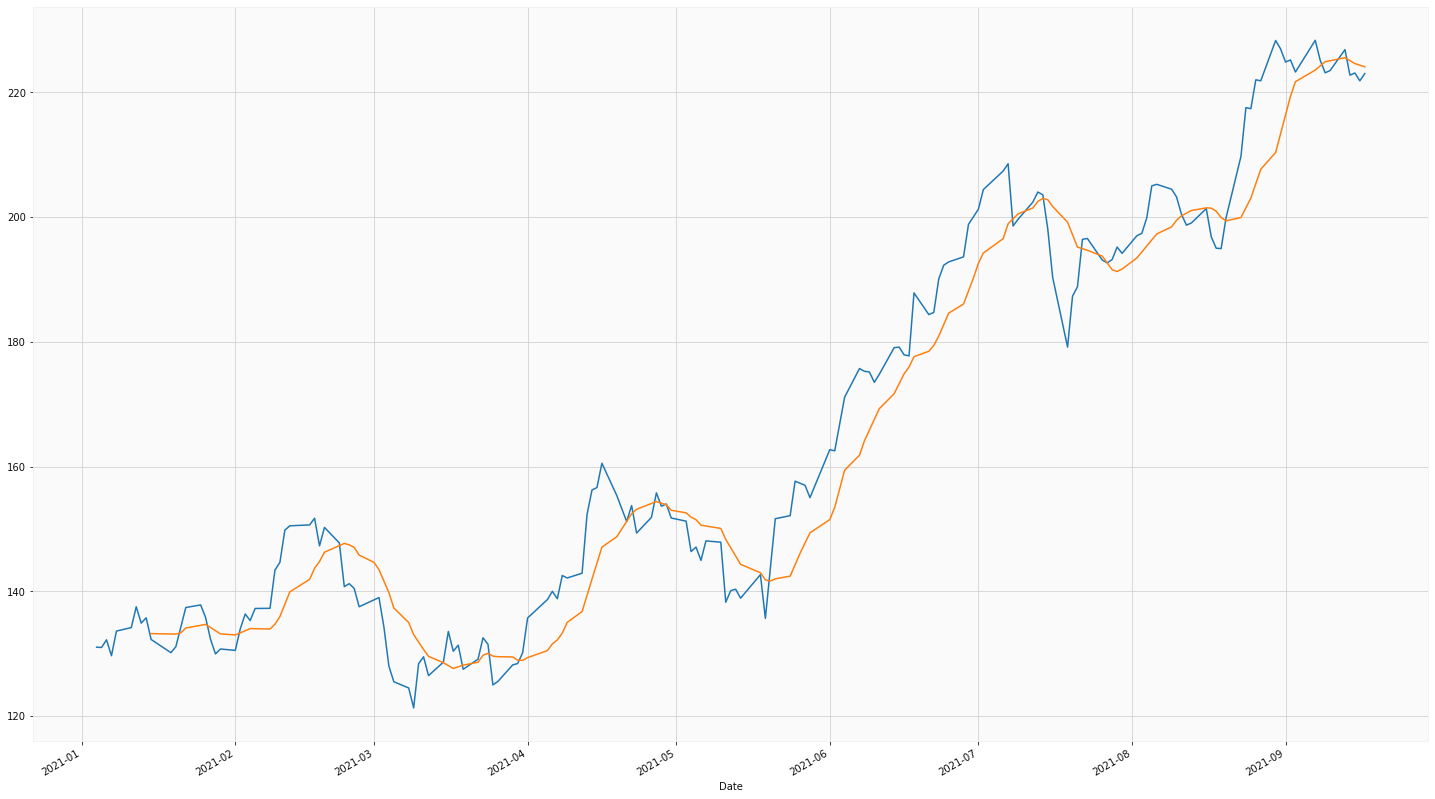

In [ ]:
nvd['Open'].plot(figsize = (25,15))
nvd['MA'] = nvd['Open'].rolling(10).mean()
nvd['MA'].plot(label = 'MA')

### 15 Day Moving Average

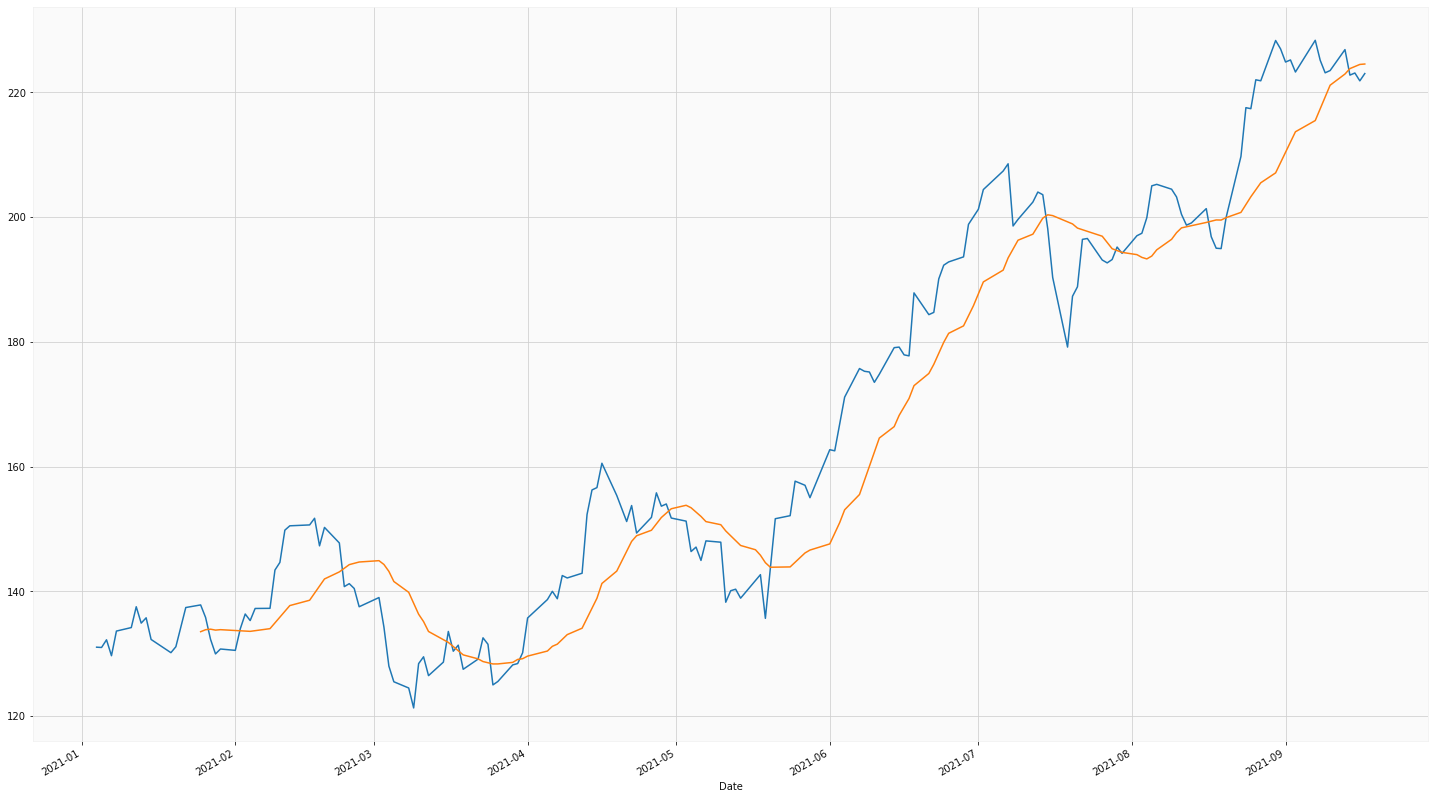

In [ ]:
nvd['Open'].plot(figsize = (25,15))
nvd['MA'] = nvd['Open'].rolling(15).mean()
nvd['MA'].plot(label = 'MA')

### 20 Day Moving Average

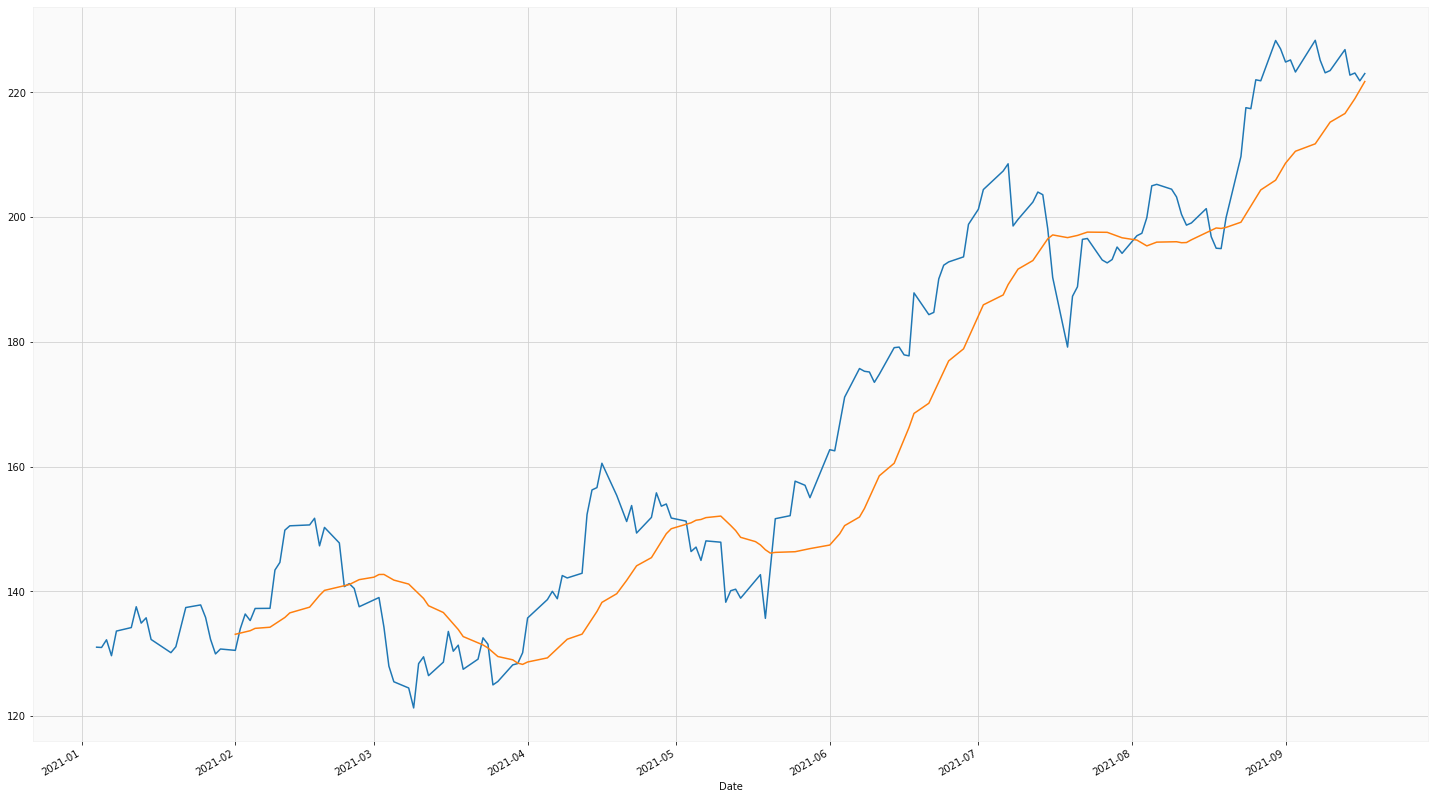

In [ ]:
nvd['Open'].plot(figsize = (25,15))
nvd['MA'] = nvd['Open'].rolling(20).mean()
nvd['MA'].plot(label = 'MA')

# Part 4 : Candlestick Chart

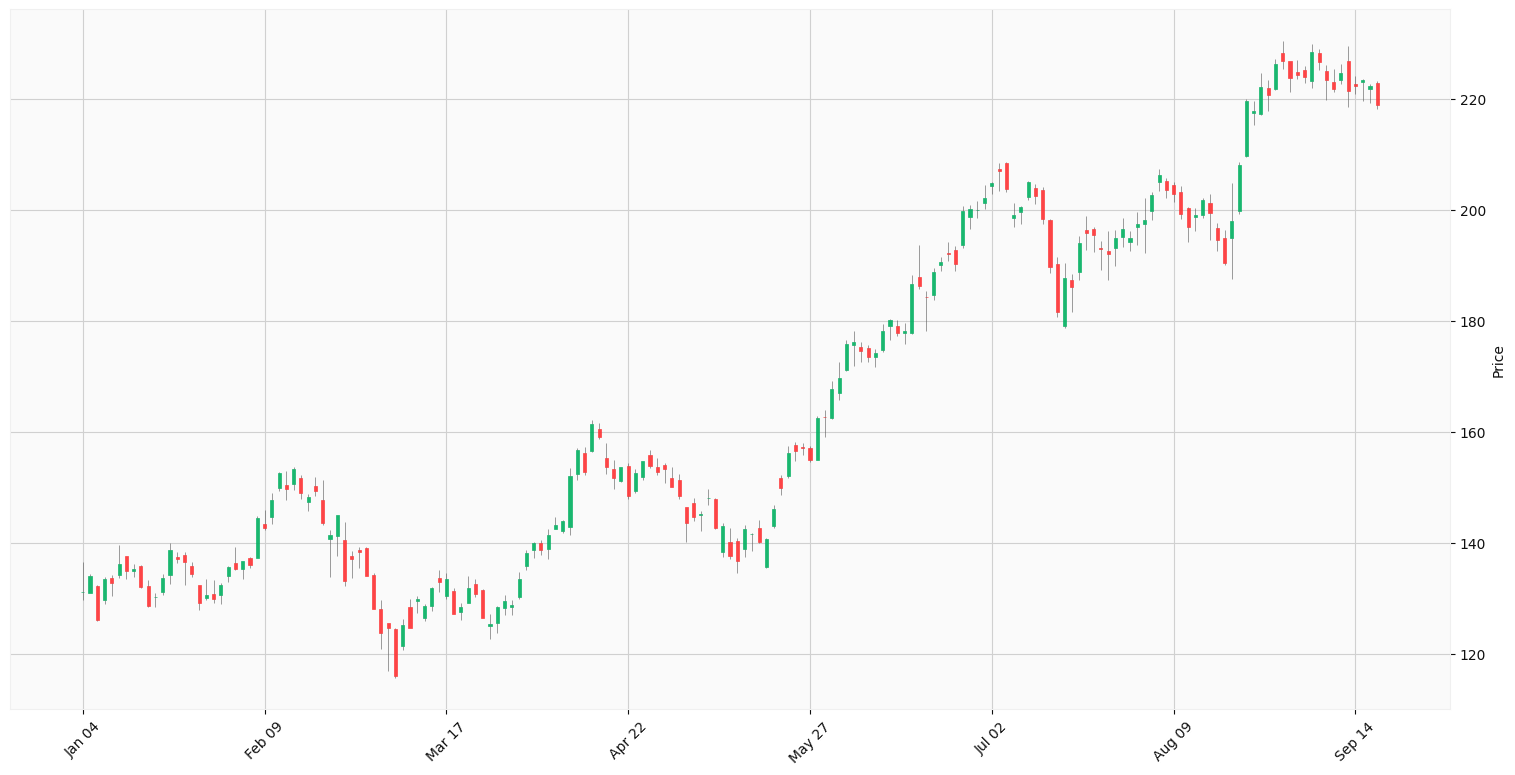

In [ ]:
mpf.plot(nvd,type='candle',figsize = (20,10), style = 'yahoo')

On observing the graph the best time to buy the stock would have been after May 17, as the prices increase on a steady rate after that, and best time to sell would be during Sep

# Part 5 : Volatility

In [ ]:
nvd['returns'] = (nvd['Close']/nvd['Close'].shift(1))-1

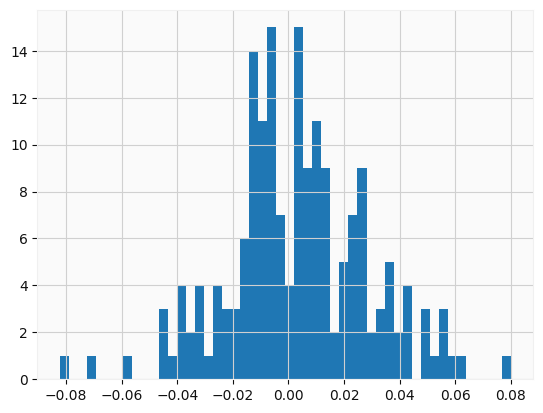

In [ ]:
nvd['returns'].hist(bins = 50)

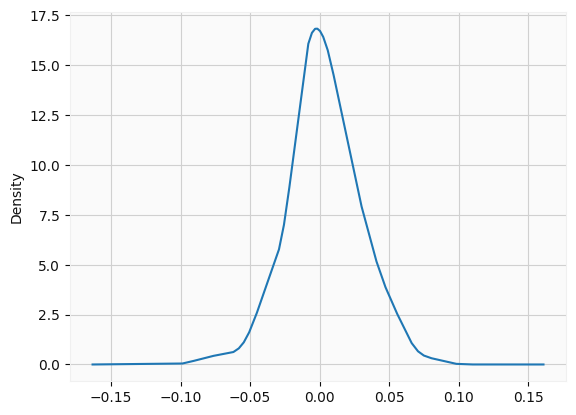

In [ ]:
nvd['returns'].plot(kind = 'kde', label = 'NVidia')

# Part 6 : Box Plot

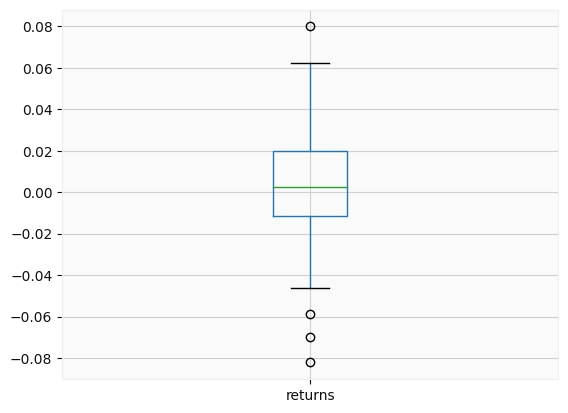

In [ ]:
box_df = nvd['returns']
box_df.plot(kind='box')

# Part 7 : Cumulative Return

A cumulative return is a recursive funtion where you multiply the cumulative return with the daily return change

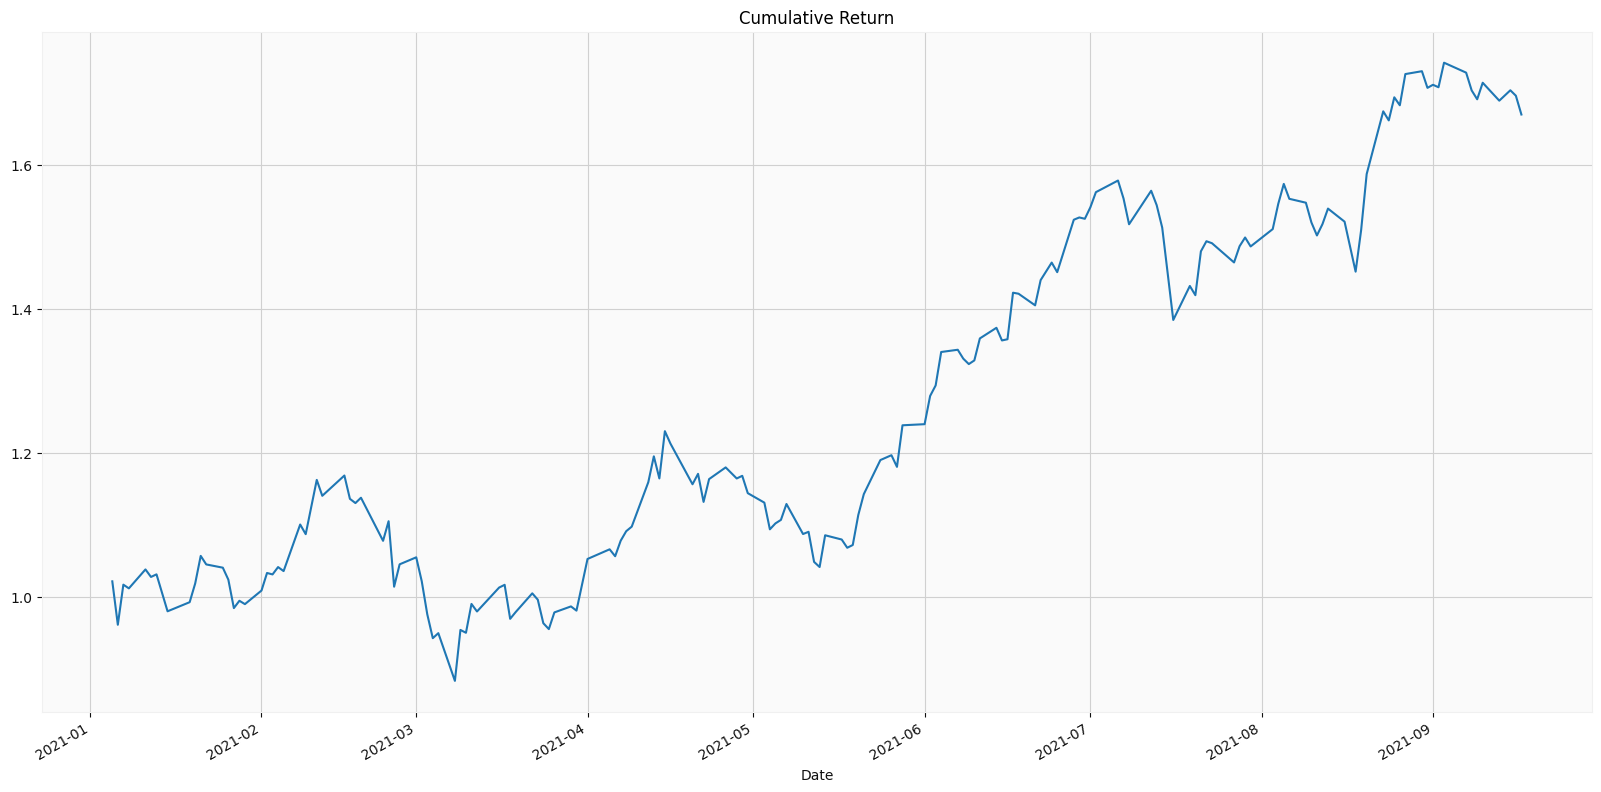

In [ ]:
nvd['Cumulative Return'] = (1+nvd['returns']).cumprod()
nvd['Cumulative Return'].plot(label = 'NVidia', figsize = (20,10),title = 'Cumulative Return')

The Cumulative Return Graph shows that if you invested in the first quarter, you would have had good returns later. After the first quarter due to increase in volume, we can see a steady increase with frequent but minor drops in price due to the influence of volume.

# Preparing the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import plotly.graph_objects as go
from plotly.offline import plot,iplot,download_plotlyjs,init_notebook_mode

In [ ]:
layout = go.Layout(
    title = 'Stock Predictions',
    xaxis = dict(
        title = 'Date',
        titlefont=dict(
            family= 'Courier New, monospace',
            size = 18,
            color='#7f7f7f'
        )
    ),
    yaxis = dict(
        title = 'Price',
        titlefont=dict(
            family= 'Courier New, monospace',
            size = 18,
            color='#7f7f7f'
        )
    )
)

In [ ]:
nvda = nvd[['Open', 'High', 'Low', 'Close']]
nvda.head()

,Open,High,Low,Close
Date,,,,
2021-01-04,131.042496,136.524994,129.625000,131.134995
2021-01-05,130.997498,134.434998,130.869995,134.047501
2021-01-06,132.225006,132.449997,125.860001,126.144997
2021-01-07,129.675003,133.777496,128.865005,133.440002
2021-01-08,133.625000,134.210007,130.419998,132.767502


# KNN 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df_X=nvda.iloc[:,:3]
df_Y=nvda.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.3, random_state=1)

### 2 Neighbors

In [ ]:
knn = KNeighborsRegressor(n_neighbors= 2)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
knn.predict(X_test)

array([183.9925005, 143.072502 , 154.78125  , 220.029999 , 140.0075   ,
       131.321251 , 201.050003 , 131.9749985, 174.4100035, 202.7249985,
       187.493744 , 174.4100035, 133.7300035, 154.1924975, 130.7537535,
       202.7249985, 135.996254 , 191.1824955, 152.5800015, 219.8399965,
       145.1500015, 119.817501 , 126.2874985, 176.4112545, 131.9749985,
       130.7537535, 130.09375  , 142.9012525, 150.875    , 145.3899995,
       127.5125005, 142.9012525, 126.0475005, 142.9012525, 138.396248 ,
       155.678749 , 199.883751 , 128.425003 , 204.967499 , 222.810005 ,
       225.0999985, 139.918747 , 129.196251 , 163.4537505, 137.78125  ,
       199.647499 , 122.1625025, 222.8650055, 145.3899995, 131.9749985,
       129.196251 , 204.967499 , 199.       , 202.7249985])

In [ ]:
knn.score(X_test,y_test)

0.9961314009476617

In [ ]:
trace0 = go.Scatter(
    x = X_train.T,
    y = y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T,
    y = knn.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)

bit_data = [trace0,trace1]
layout.xaxis.title.text = 'Days'
plot = go.Figure(data = bit_data,layout = layout)

In [ ]:
iplot(plot)

### 5 Neighbors

In [ ]:
knn = KNeighborsRegressor(n_neighbors= 5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
knn.predict(X_test)

array([182.5679964, 143.923001 , 154.241498 , 217.3449984, 141.2334994,
       131.8955018, 201.5149994, 131.2420012, 177.0725004, 202.0419984,
       184.1714968, 174.9744994, 132.9785004, 151.8354982, 132.625003 ,
       202.276999 , 134.998001 , 191.1584992, 151.6589996, 221.4559998,
       144.913501 , 124.2335022, 128.2714996, 177.0725004, 132.9785004,
       130.440001 , 130.1134994, 141.7110016, 153.2184998, 147.4600006,
       128.386499 , 143.923001 , 127.0340012, 141.7110016, 137.8794984,
       154.3125   , 199.3595   , 128.3440018, 202.0419984, 223.0820038,
       224.1980012, 139.1825012, 127.9515014, 161.4404998, 136.5679994,
       200.3404998, 124.2335022, 224.1980012, 148.025    , 131.8880004,
       127.9515014, 203.9910006, 196.2205016, 202.0419984])

In [ ]:
knn.score(X_test,y_test)

0.9967261340709516

In [ ]:
trace0 = go.Scatter(
    x = X_train.T,
    y = y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T,
    y = knn.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)

bit_data = [trace0,trace1]
layout.xaxis.title.text = 'Days'
plot = go.Figure(data = bit_data,layout = layout)

In [ ]:
iplot(plot)

### 10 Neighbors

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
knn.predict(X_test)

array([181.9779984, 144.1497498, 153.4782502, 214.6164995, 141.6392502,
       132.3355011, 201.5559997, 130.625    , 177.4644989, 202.3517502,
       181.9779984, 174.7649994, 132.3355011, 151.3014985, 132.6982514,
       202.3517502, 135.8057496, 191.7159989, 150.8269989, 221.9560014,
       146.7072494, 126.737001 , 129.6885002, 177.4644989, 131.1239998,
       130.8672501, 129.9197509, 142.1740006, 151.6654985, 148.2520004,
       130.625    , 144.1497498, 126.737001 , 141.8485001, 136.6627503,
       156.4067505, 198.7372497, 128.1947502, 202.2515   , 222.9450013,
       222.9450013, 138.7122498, 128.6840004, 159.1985001, 137.8819993,
       199.55325  , 126.737001 , 223.4550004, 148.2982483, 131.1239998,
       128.6840004, 202.3517502, 194.98125  , 202.3517502])

In [ ]:
knn.score(X_test,y_test)

0.9954728676672341

In [ ]:
trace0 = go.Scatter(
    x = X_train.T,
    y = y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T,
    y = knn.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)

bit_data = [trace0,trace1]
layout.xaxis.title.text = 'Days'
plot = go.Figure(data = bit_data,layout = layout)

In [ ]:
iplot(plot)

### 20 Neighbors

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 20)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:
knn.predict(X_test)

array([185.2816239 , 144.32987445, 153.3229996 , 214.5322503 ,
       140.36324925, 132.30800095, 200.02662505, 131.28562585,
       177.3709992 , 200.02662505, 186.27987445, 173.6863747 ,
       132.30800095, 151.6711243 , 132.74237595, 200.02662505,
       136.87075045, 192.6386246 , 151.22937475, 217.06900035,
       147.48837435, 129.7176262 , 130.75312615, 180.67462395,
       131.28562585, 132.74237595, 130.75312615, 141.9783745 ,
       152.6604996 , 149.5453743 , 131.0511257 , 144.71650005,
       129.7176262 , 141.33749925, 136.62750025, 153.81599965,
       197.8745002 , 129.7176262 , 201.1441246 , 217.06900035,
       217.06900035, 138.70462425, 130.75312615, 155.5767495 ,
       137.4474999 , 197.8745002 , 129.7176262 , 217.06900035,
       149.5453743 , 131.7997509 , 130.75312615, 200.02662505,
       195.4542503 , 200.02662505])

In [ ]:
knn.score(X_test,y_test)

0.9880697536135978

In [ ]:
trace0 = go.Scatter(
    x = X_train.T,
    y = y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T,
    y = knn.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)

bit_data = [trace0,trace1]
layout.xaxis.title.text = 'Days'
plot = go.Figure(data = bit_data,layout = layout)

In [ ]:
iplot(plot)

### 50 Neighbors

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 50)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=50)

In [ ]:
knn.predict(X_test)

array([186.36229982, 143.67324986, 147.13969944, 202.87929998,
       140.50799976, 136.47585024, 201.90374974, 136.47585024,
       174.35769962, 202.87929998, 186.36229982, 173.33764956,
       136.47585024, 146.47859958, 136.47585024, 202.87929998,
       137.12455004, 194.19354954, 146.47859958, 202.87929998,
       145.2868497 , 136.47585024, 136.47585024, 178.3130997 ,
       136.47585024, 136.47585024, 136.47585024, 141.96229984,
       147.13969944, 145.2868497 , 136.47585024, 143.25659978,
       136.47585024, 141.5171497 , 136.47585024, 149.52364962,
       198.85600008, 136.47585024, 202.87929998, 202.87929998,
       202.87929998, 138.1168999 , 136.47585024, 155.01764926,
       137.12455004, 198.99419986, 136.47585024, 202.87929998,
       145.82929966, 136.47585024, 136.47585024, 202.87929998,
       197.77294986, 202.87929998])

In [ ]:
knn.score(X_test,y_test)

0.9414079670794012

In [ ]:
trace0 = go.Scatter(
    x = X_train.T,
    y = y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T,
    y = knn.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)

bit_data = [trace0,trace1]
layout.xaxis.title.text = 'Days'
plot = go.Figure(data = bit_data,layout = layout)

In [ ]:
iplot(plot)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df = nvd[['Adj Close']]

In [ ]:
pip install pandas-ta


     |████████████████████████████████| 115 kB 6.7 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=bac26ebf38650d9c9fbde77749852d665ef497f60ce8096e73612bc3bfc826e7
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import pandas_ta

In [ ]:
df.ta.ema(close='Adj Close', length=10, append=True)
df.head(10)

,Adj Close,EMA_10
Date,,
2021-01-04,131.036606,NaN
2021-01-05,133.946930,NaN
2021-01-06,126.050354,NaN
2021-01-07,133.339874,NaN
2021-01-08,132.667877,NaN


In [ ]:
df = df.iloc[10:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size=.2)

In [ ]:
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.94562179]]
Mean Absolute Error: 4.356229517317284
Coefficient of Determination: 0.9623863983187151


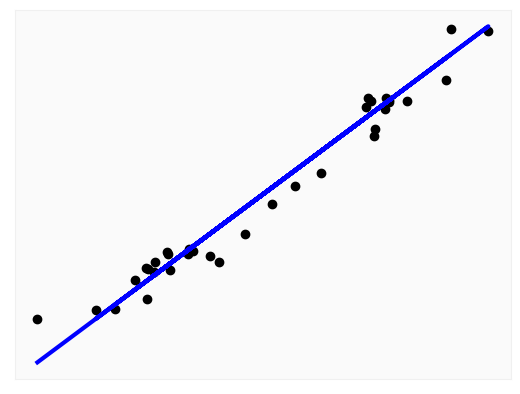

In [ ]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
X = np.array(nvd.index).reshape(-1,1)
y = nvd['Close']

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
clf = SVR()
clf.fit(X_train,y_train)

SVR()

In [ ]:
clf.predict(X_test)

array([177.84497419, 157.48659896, 165.77962969, 194.42712228,
       142.37621601, 144.65207648, 184.31292011, 143.35324433,
       173.84677898, 184.73531746, 179.78123589, 171.30805769,
       144.79332195, 155.05715269, 146.76086887, 188.56816345,
       144.12314995, 180.72674202, 142.43104395, 190.45312519,
       157.06827722, 142.70050317, 143.92883592, 172.83254929,
       144.49594161, 142.59220526, 143.5629675 , 148.21612899,
       151.46513384, 142.38785126, 143.88252702, 163.8312169 ,
       144.98178492, 162.87588044, 146.22589777, 166.76981364,
       194.57939965, 143.24716138, 186.74564487, 192.22555307,
       194.07324051, 160.55315595, 145.71176297, 169.78540702,
       142.54590037, 194.62152086, 142.98061626, 191.81755881,
       142.36022555, 143.65823019, 145.90911904, 194.1096252 ,
       194.63412716, 194.21391624])

In [ ]:
clf.score(X_test,y_test)

0.7859985553271389

In [ ]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = clf.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)

bit_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot = go.Figure(data = bit_data,layout = layout)

In [ ]:
iplot(plot)

# Prophet

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

In [ ]:
data = pd.read_csv('NVDA.csv')

In [ ]:
df_train = data[['Date','Close']]
df_train = df_train.rename(columns = {"Date":"ds", "Close":"y"})

In [ ]:
n_years = 1
period = n_years * 365

In [ ]:
m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(periods = period)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
fig1 = plot_plotly(m, forecast)
fig1

# LSTM (Long Short-Term Memory)

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#creating dataframe
df = pd.read_csv('NVDA.csv')
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
df.shape

(179, 7)

In [ ]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [ ]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:107,:]
valid = dataset[107:,:]

In [ ]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
47/47 - 4s - loss: 0.0180 - 4s/epoch - 89ms/step
Epoch 2/5
47/47 - 1s - loss: 0.0068 - 1s/epoch - 23ms/step
Epoch 3/5
47/47 - 1s - loss: 0.0065 - 1s/epoch - 23ms/step
Epoch 4/5
47/47 - 1s - loss: 0.0074 - 1s/epoch - 23ms/step
Epoch 5/5
47/47 - 1s - loss: 0.0040 - 1s/epoch - 23ms/step


In [ ]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

25.045858281433777

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

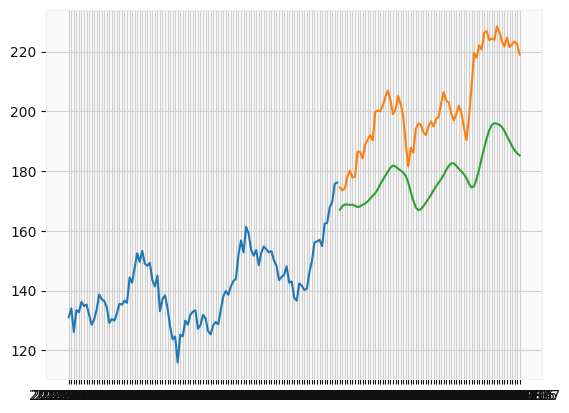

In [ ]:
#for plotting
train = new_data[:107]
valid = new_data[107:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])